## This code is a python exercise with astronomical data using the astropy python module




### Step 1. Importing the modules
 This may seem obvious, but it is an important step in every python code, we need to import all the modules that we're going to be working with
 it is done with the __import__ keyword as follows:\
 import __*module_name*__ as __*call_sign*__ (where __*call_sign*__ is how you'll call commands from the module later)
><span style="color:green">__import__</span> numpy <span style="color:green">__as__</span> np
>
> <span style="color:green">__import__</span> matplotlib.pyplot <span style="color:green">__as__</span> plt
>
> <span style="color:green">__from__</span> astropy.io <span style="color:green">__import__</span> fits
>
> <span style="color:green">__from__</span> astropy.table <span style="color:green">__import__</span> Table



### Step 2. Loading the .fits file
A file in .fits format, contains 2 parts:\
The so called "Header", which contains information about the creation of the file. For example what the object depicted is, what are the coordinates of the central pixel, which filters was it taken in and more.\
And the "Data", which contains the bulk of the file.

A standard .fits file looks similar to this:\
*insert picture of .fits table, too lazy to do this now*

The astropy module has the function to operate with said .fits files. We can load in only certain columns of a table formatted .fits file using "Table.read('name_of_file')"\
and then loading in different columns (called by their names in the header) into different variables, creating arrays of data.
>t = Table.<span style="color:blue">read</span><span style="color:brown">('./hst_results_nd.fits')</span>\
ra = t<span style="color:brown">['RA']</span>\
de = t<span style="color:brown">['DEC']</span>\
Av = t<span style="color:brown">['Av_p50']</span>\
r = t<span style="color:brown">['distance_p50']</span>\
temp = t<span style="color:brown">['logT_p50']</span>\
age = t<span style="color:brown">['logA_p50']</span>\
F475W = t<span style="color:brown">['F475W_VEGA']</span>\
F814W = t<span style="color:brown">['F814W_VEGA']</span>

### Step 3. Creating Graphs and Figures
After the data has been loaded in, we can use it to create scatter plots, histograms, or really any other type of graphs, complete with color coded characteristics or calculated means.\
Here's some examples:\

Using the __matplotlib__ module we'll create the following graphs:\
I. A graph of the position of different stars on the equatorial coordinate system in the data set, colorcoded with the distance to each data point.\
II. A histogram of the distance to each data point, with a mean distance of the data set.\

I.
We create a scatter plot using the right ascenscion (ra) and declination (de) that we loaded in the previous step, adding "c = r" makes a colorbar using\
the distance (r) that we loaded up in the previous step and colormap (cmap) that we chose
(in this care 'berlin', there's a list of different cmaps that can be checked with __list(colormaps)__)
>plt.<span style="color:blue">figure</span>()\
cb = plt.<span style="color:blue">scatter</span>( ra, de, c = r, s = <span style="color:green">8</span>, cmap = '<span style="color:brown">berlin</span>', marker = '<span style="color:brown">o</span>', vmin = <span style="color:green">40000</span>, vmax = <span style="color:green">65000</span>)\
plt.<span style="color:blue">colorbar</span>(cb, label = 'distance [pc]')\
plt.<span style="color:blue">ylabel</span>('<span style="color:brown">Declination</span>')\
plt.<span style="color:blue">xlabel</span>('<span style="color:brown">Right Ascension</span>')

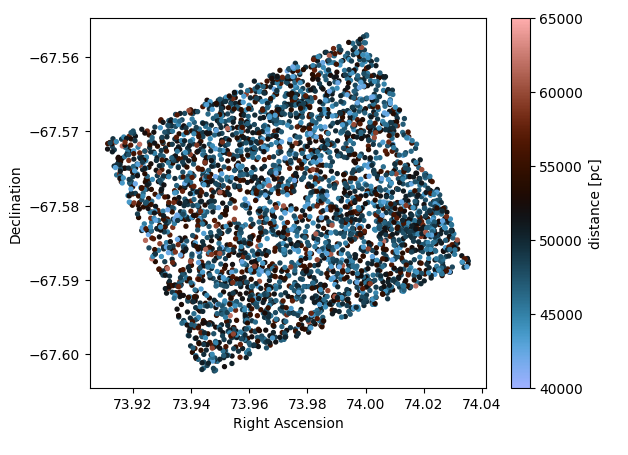


II.
We create a histogram by using again the distance (r), loaded up in the previous step, and the plt.hist command, where we specify the size (r/1000) and amount (60) of bins.\
we also add a red line on the mean of the distance, which we calculate using the np.mean command from the numpy module, using the plt.axvline command.\
finally we save the file as "distancehist.png" using the plt.savefig command
>plt.<span style="color:blue">figure</span>()\
plt.<span style="color:blue">hist</span>(r/1000, bins = 60)\
plt.<span style="color:blue">xlabel</span>('<span style="color:brown">distance</span>')\
d_mean = np.<span style="color:blue">mean</span>(r)\
plt.<span style="color:blue">axvline</span>(d_mean/1000, c='r')\
plt.<span style="color:blue">text</span>(60, 100, '%s' % np.round(d_mean/1000))\
plt.<span style="color:blue">savefig</span>("<span style="color:brown">distancehist.png</span>")

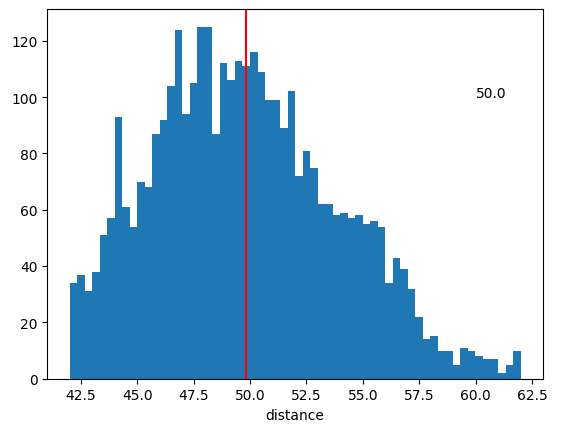

### Step 4. Filtering data.
Let's say we want to create a CMD of the stars in the dataset, but we also want to filter out certain stars. Astropy is incredibly useful in this regard\
as you can apply a filter onto a loaded column (or columns) of a table, and essentially create a new table containing all the data for the stars that passed the filter.\
This is done using the following command:
>hot_stars = t[temp > 4]

Which checks all the data in the "temp" column, and deletes any row that has temp less than 4.\

We can also add some other filters:
>young_stars = t[age < 8.5]\
 old_stars = t[age > 10] <span style="color:gray">#here the age of the stars is given in base log_10</span>

We can then plot all the stars, and only the filter results onto a CMD:
>plt.plot(F475W-F814W, F475W, '.' ,ls = '', label = 'all stars', color = '#bfbfbf')\
>plt.plot(young_stars<span style="color:brown">['F475W_VEGA']</span> - young_stars<span style="color:brown">['F814W_VEGA']</span>, young_stars<span style="color:brown">['F475W_VEGA']</span>, 'o' ,ls = '', label = 'young stars', color = '#bf00bf')\
plt.plot(old_stars<span style="color:brown">['F475W_VEGA']</span> - old_stars<span style="color:brown">['F814W_VEGA']</span>, old_stars<span style="color:brown">['F475W_VEGA']</span>, 'o' ,ls = '', label = 'old stars', color = '#00bfbf')\
>plt.plot(hot_stars<span style="color:brown">['F475W_VEGA']</span> - hot_stars<span style="color:brown">['F814W_VEGA']</span>, hot_stars<span style="color:brown">['F475W_VEGA']</span>, 'o' ,ls = '', label = 'hot stars', color = '#6faf00')\
>plt.legend()

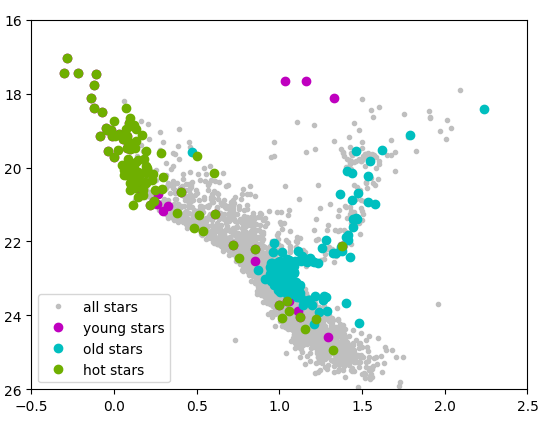